<h1>PEOPLE ANALYTICS</h1>

---

In [229]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import warnings
import re

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/dados_func.csv')

In [3]:
df.head()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<h2>VISÃO GERAL DOS DADOS<h2>

In [4]:
df_eda = df.copy()

In [5]:
df_eda.shape

(14999, 10)

In [6]:
df_eda.columns

Index(['nivel_satisfacao', 'ultima_avaliacao', 'numero_projetos',
       'horas_medias_por_mes', 'tempo_empresa', 'acidente_trabalho',
       'deixou_empresa', 'ultima_promocao_5anos', 'area', 'salario'],
      dtype='object')

In [7]:
df_eda.isnull().sum()

nivel_satisfacao         0
ultima_avaliacao         0
numero_projetos          0
horas_medias_por_mes     0
tempo_empresa            0
acidente_trabalho        0
deixou_empresa           0
ultima_promocao_5anos    0
area                     0
salario                  0
dtype: int64

In [8]:
df_eda.head()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
df_eda.describe()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


---

<h2>ANÁLISE UNIVARIADA<h2>

<h3>.1) Deixou a Empresa (deixou_empresa)</h3>

In [10]:
df_ind = df.copy()

In [11]:
proporcao = pd.DataFrame(round(df_ind.groupby(['deixou_empresa'])['deixou_empresa'].count() / len(df_ind) * 100, 2))
proporcao

,deixou_empresa
deixou_empresa,
0,76.19
1,23.81


In [12]:
fig = px.pie(proporcao, values='deixou_empresa', names=['Não', 'Sim'], title='Proporção de colaboradores que deixaram a empresa')

fig.update_traces(marker=dict(colors=['#05995e', '#d12806']), textinfo='percent', textfont_size=16)

fig.update_layout(
    autosize=False,
    width=600,
    height=400
)

fig.show()

<h3>.2) Nível de Satisfação (nivel_satisfacao)</h3>

In [13]:
df_ind.head()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
df_ind['nivel_satisfacao'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: nivel_satisfacao, dtype: float64

<AxesSubplot:xlabel='nivel_satisfacao', ylabel='Count'>

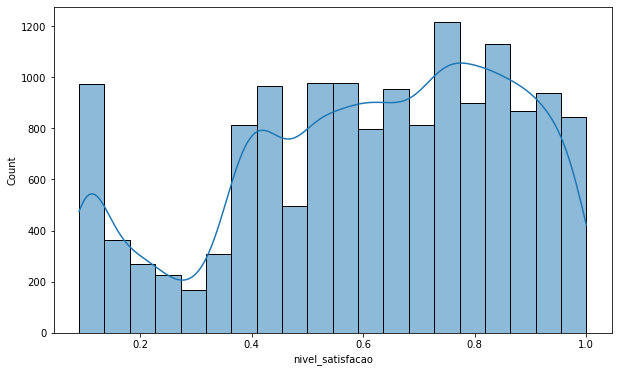

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df_ind['nivel_satisfacao'] , kde=True, bins=20)

In [16]:
def exibeBarplot(df, coluna, xlabel = 'x', ylabel = 'y', title = 'default', width=800, height=400):
    values = pd.DataFrame(df[coluna].value_counts().sort_index())
    values['percent'] = values[coluna].apply(lambda x: round(x / np.sum(values[coluna].values) * 100, 2))
    values['text1'] = values[coluna].astype(str)
    values['text2'] = values['percent'].astype(str)

    values['text'] = values['text1'] + ' [' + values['text2'] + '%]' 



    fig = px.bar(x=values.index, y=values[coluna], text=values['text'])

    fig.update_layout(
        title=f'<span>{title}</span>', 
        autosize=False,
        width=width,
        height=height,
        xaxis=dict(title=f'<span>{xlabel}</span>'),
        yaxis=dict(title=f'<span>{ylabel}</span>')
    )

    fig.show()

In [17]:
df_ind['nivel_satisfacao_bins'] = pd.cut(df_ind['nivel_satisfacao'], [0, 0.2, 0.4, 0.6, 0.8, 1], 
                                        labels=['péssimo [0-20]', 'baixo [20-40]', 'médio [40-60]', 'bom [60-80]', 'ótimo [80-100]'])

In [18]:
exibeBarplot(df_ind, 'nivel_satisfacao_bins', title='Quantidade de nível de satisfação dos colaboradores', xlabel='Satisfação', ylabel='Quantidade')

<h3>.3) Última Avaliação (ultima_avaliacao)</h3>

In [19]:
df['ultima_avaliacao'].describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: ultima_avaliacao, dtype: float64

[Text(0.5, 1.0, 'Histograma da última avaliação')]

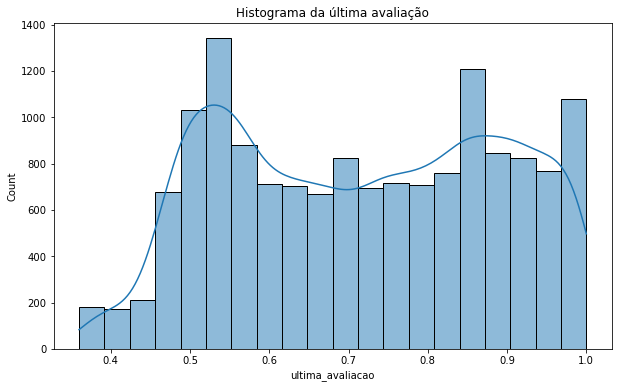

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df_ind['ultima_avaliacao'], kde=True, bins=20).set(title='Histograma da última avaliação')

In [21]:
df_ind['ultima_avaliacao_bins'] = pd.cut(df_ind['ultima_avaliacao'], [0, 0.2, 0.4, 0.6, 0.8, 1], 
                                        labels=['péssimo [0-20]', 'baixo [20-40]', 'médio [40-60]', 'bom [60-80]', 'ótimo [80-100]'])

In [22]:
exibeBarplot(df_ind, 'ultima_avaliacao_bins', xlabel='Satisfação', ylabel='Quantidade', title='Quantidade de satisfação na última avaliação')

<h3>.4) Quantidade de Projetos (numero_projetos)</h3>

In [23]:
df_ind['numero_projetos'].describe()

count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: numero_projetos, dtype: float64

In [24]:
df_ind['numero_projetos'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: numero_projetos, dtype: int64

In [25]:
exibeBarplot(df_ind, coluna='numero_projetos', xlabel='Número de projetos' , ylabel='Quantidade', title='Quantidade por números de projeto', width=1000, height=600)

<h3>.5) Média de horas trabalhadas por mês (horas_medias_por_mes)</h3>

In [26]:
df_ind['horas_medias_por_mes'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: horas_medias_por_mes, dtype: float64

In [27]:
week_mean = round(df_ind['horas_medias_por_mes'].describe()['mean'] / 4.5)
print(f'A média de horas trabalhadas por semana é de {week_mean} horas')

A média de horas trabalhadas por semana é de 45 horas


In [28]:
df_ind.sort_values(by=['horas_medias_por_mes'], ascending=False).head(5)

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario,nivel_satisfacao_bins,ultima_avaliacao_bins
803,0.10,0.77,6,310,4,0,1,0,technical,medium,péssimo [0-20],bom [60-80]
809,0.11,0.97,7,310,4,0,1,0,support,medium,péssimo [0-20],ótimo [80-100]
1717,0.11,0.96,6,310,4,0,1,0,technical,low,péssimo [0-20],ótimo [80-100]
14975,0.10,0.79,7,310,4,0,1,0,hr,medium,péssimo [0-20],bom [60-80]
1936,0.11,0.97,6,310,4,0,1,0,accounting,medium,péssimo [0-20],ótimo [80-100]


In [29]:
df_ind.sort_values(by=['horas_medias_por_mes'], ascending=True).head(5)

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario,nivel_satisfacao_bins,ultima_avaliacao_bins
10020,0.50,0.58,4,96,3,0,0,0,sales,low,médio [40-60],médio [40-60]
2678,0.79,0.61,5,96,4,0,0,0,marketing,medium,bom [60-80],bom [60-80]
8605,0.48,0.43,3,96,3,0,0,0,support,low,médio [40-60],médio [40-60]
7492,0.15,0.98,2,96,2,0,0,0,sales,high,péssimo [0-20],ótimo [80-100]
9221,0.92,0.82,4,96,4,0,0,0,IT,medium,ótimo [80-100],ótimo [80-100]


<h3>.6) Tempo como funcionário da empresa (tempo_empresa)</h3>

In [30]:
df_ind['tempo_empresa'].describe()

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: tempo_empresa, dtype: float64

In [31]:
display(df_ind.sort_values(by=['tempo_empresa'], ascending=True).head(5))
display(df_ind.sort_values(by=['tempo_empresa'], ascending=False).head(5))

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario,nivel_satisfacao_bins,ultima_avaliacao_bins
7499,0.93,0.58,5,238,2,0,0,0,sales,medium,ótimo [80-100],médio [40-60]
3966,0.82,0.58,4,202,2,0,0,0,RandD,medium,ótimo [80-100],médio [40-60]
9324,0.57,0.66,4,158,2,0,0,0,sales,low,médio [40-60],bom [60-80]
9325,0.55,0.54,5,168,2,0,0,0,sales,low,médio [40-60],médio [40-60]
3960,0.50,0.55,3,188,2,0,0,0,product_mng,medium,médio [40-60],médio [40-60]


,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario,nivel_satisfacao_bins,ultima_avaliacao_bins
11630,0.68,0.67,4,162,10,0,0,0,management,high,bom [60-80],bom [60-80]
11230,0.99,0.84,4,142,10,0,0,0,technical,high,ótimo [80-100],ótimo [80-100]
13742,0.67,0.72,2,134,10,0,0,0,management,high,bom [60-80],bom [60-80]
11232,0.65,0.85,4,201,10,0,0,0,support,low,bom [60-80],ótimo [80-100]
13741,0.60,0.65,2,225,10,0,0,0,management,high,médio [40-60],bom [60-80]


In [32]:
df_ind['tempo_empresa'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: tempo_empresa, dtype: int64

In [33]:
exibeBarplot(df_ind, coluna='tempo_empresa', xlabel='Tempo médio como funcionário da empresa', ylabel='Quantidade', 
                width=1300, height=600, title='Quantidade de funcionários por tempo médio em anos na empresa')

<h3>.7) Acidente de Trabalho (acidente_trabalho)</h3>

In [34]:
df_ind['acidente_trabalho'].value_counts()

0    12830
1     2169
Name: acidente_trabalho, dtype: int64

In [35]:
exibeBarplot(df_ind, coluna='acidente_trabalho', xlabel='Acidentes de trabalho', ylabel='Quantidade', 
                title='Quantidade de pessoas que sofreram acidades de trabalho', width=600)

<h3>.8) Promoção do funcionário nos últimos 5 anos (ultima_promocao_5anos)</h3>

In [36]:
df_ind['ultima_promocao_5anos'].value_counts()

0    14680
1      319
Name: ultima_promocao_5anos, dtype: int64

In [37]:
exibeBarplot(df_ind, coluna='ultima_promocao_5anos', xlabel='Promoção [0 = Não|1 = Sim]', width=600, height=400,
                title='Quantidade de promoções por quantidade de funcionários nos últimos 5 anos')

<h3>.9) Área de atuação (area)</h3>

In [38]:
exibeBarplot(df_ind, coluna='area', xlabel='Áreas de atuação', ylabel='Quantidade', 
            title='Quantidade de pessoas por cargo', width=1300, height=500)

<h3>.10) Salário categórico (salario)</h3>

In [39]:
exibeBarplot(df_ind, coluna='salario', xlabel='Categorias de salário', ylabel='Quantidade', 
            title='Quantidade por categoria de salário', width=900, height=500)

---

<h2>ANÁLISE MULTIVARIADA<h2>

In [51]:
df_mul = df_ind.copy()
df_mul.head()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,deixou_empresa,ultima_promocao_5anos,area,salario,nivel_satisfacao_bins,ultima_avaliacao_bins
0,0.38,0.53,2,157,3,0,1,0,sales,low,baixo [20-40],médio [40-60]
1,0.80,0.86,5,262,6,0,1,0,sales,medium,bom [60-80],ótimo [80-100]
2,0.11,0.88,7,272,4,0,1,0,sales,medium,péssimo [0-20],ótimo [80-100]
3,0.72,0.87,5,223,5,0,1,0,sales,low,bom [60-80],ótimo [80-100]
4,0.37,0.52,2,159,3,0,1,0,sales,low,baixo [20-40],médio [40-60]


In [113]:
df_temp

,deixou_empresa,nivel_satisfacao_bins,count
9,1,ótimo [80-100],549
8,1,bom [60-80],422
7,1,médio [40-60],865
6,1,baixo [20-40],811
5,1,péssimo [0-20],924
4,0,ótimo [80-100],3453
3,0,bom [60-80],3846
2,0,médio [40-60],2740
1,0,baixo [20-40],835
0,0,péssimo [0-20],554


In [141]:
def exibeBarplotMult(df, colunaIndex, labels, x, y, title='Default', xlabel='x_default', ylabel='y_default', width=1000, height=600):
    fig = go.Figure()

    for key, value in enumerate(labels):

        _df = df.loc[df[colunaIndex] == key]

        fig.add_traces(go.Bar(
            x=_df[x],
            y=_df[y],
            name=value,
            text=_df[y]
        ))

    fig.update_layout(
        title=f'<span>{title}</span>', 
        autosize=False,
        width=width,
        height=height,
        xaxis=dict(title=f'<span>{xlabel}</span>'),
        yaxis=dict(title=f'<span>{ylabel}</span>')
    )

    fig.show()

    #return fig

<h3>.1) Deixou a empresa com as demais variáveis</h3>

<AxesSubplot:>

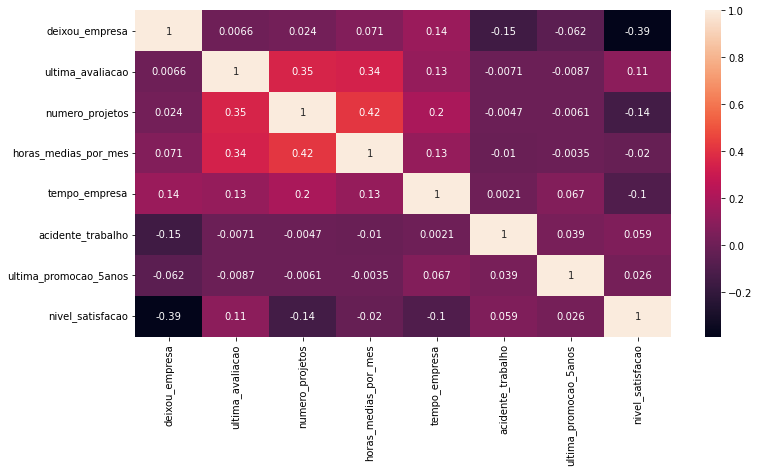

In [142]:
df_corr = df_mul[['deixou_empresa', 'ultima_avaliacao', 'numero_projetos',
       'horas_medias_por_mes', 'tempo_empresa', 'acidente_trabalho',
       'ultima_promocao_5anos', 'nivel_satisfacao', 'area', 'salario', 'nivel_satisfacao_bins', 'ultima_avaliacao_bins']].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(df_corr, annot=True)

In [148]:
def compararAtributos(df, coluna1, coluna2, colunaAlvo, aggFunc):
    df_temp = df.copy()
    df_temp = df_temp.groupby([coluna1, coluna2], as_index=False)[colunaAlvo].agg(aggFunc)
    
    df_temp = df_temp.reset_index()
    df_temp = df_temp.sort_values(by=[coluna1, coluna2], ascending=True)

    return df_temp

In [152]:
df_temp = compararAtributos(df_mul, 'deixou_empresa', 'nivel_satisfacao_bins', 'nivel_satisfacao', ['count'])
display(df_temp)

exibeBarplotMult(df_temp, colunaIndex='deixou_empresa', 
                x='nivel_satisfacao_bins', 
                y='count', labels=['Não', 'Sim'], 
                width=1200, height=400, 
                title='Quantidade de demissões e não demissões por grupo de satisfação dos colaboradores',
                xlabel='Nível de satisfação', ylabel='Quantidade')

,deixou_empresa,nivel_satisfacao_bins,count
0,0,péssimo [0-20],554
1,0,baixo [20-40],835
2,0,médio [40-60],2740
3,0,bom [60-80],3846
4,0,ótimo [80-100],3453
5,1,péssimo [0-20],924
6,1,baixo [20-40],811
7,1,médio [40-60],865
8,1,bom [60-80],422
9,1,ótimo [80-100],549


In [154]:
df_temp = compararAtributos(df_mul, 'deixou_empresa', 'ultima_avaliacao_bins', 'ultima_avaliacao', ['count', 'mean'])
display(df_temp)

exibeBarplotMult(df_temp, colunaIndex='deixou_empresa', 
                x='ultima_avaliacao_bins', 
                y='count', labels=['Não', 'Sim'], 
                width=1200, height=400, 
                title='Quantidade de demissões e não demissões por última avaliação dos colaboradores',
                xlabel='Última avaliação', ylabel='Quantidade')

,deixou_empresa,ultima_avaliacao_bins,count,mean
0,0,péssimo [0-20],0,NaN
1,0,baixo [20-40],236,0.382839
2,0,médio [40-60],3112,0.529865
3,0,bom [60-80],4282,0.703206
4,0,ótimo [80-100],3798,0.902056
5,1,péssimo [0-20],0,NaN
6,1,baixo [20-40],0,NaN
7,1,médio [40-60],1615,0.512087
8,1,bom [60-80],265,0.751887
9,1,ótimo [80-100],1691,0.909586


In [155]:
df_temp = compararAtributos(df_mul, 'deixou_empresa', 'area', 'ultima_avaliacao', ['count'])
display(df_temp)


exibeBarplotMult(df_temp, colunaIndex='deixou_empresa', 
                x='area', 
                y='count', labels=['Não', 'Sim'], 
                width=1200, height=400, 
                title='Quantidade de demissões e não demissões por area de atuação',
                xlabel='Area', ylabel='Quantidade')

,deixou_empresa,area,count
0,0,IT,954
1,0,RandD,666
2,0,accounting,563
3,0,hr,524
4,0,management,539
5,0,marketing,655
6,0,product_mng,704
7,0,sales,3126
8,0,support,1674
9,0,technical,2023


In [156]:
df_temp = compararAtributos(df_mul, 'deixou_empresa', 'numero_projetos', 'area', ['count'])
display(df_temp)

exibeBarplotMult(df_temp, colunaIndex='deixou_empresa', 
                x='numero_projetos', 
                y='count', labels=['Não', 'Sim'], 
                width=1200, height=400, 
                title='Quantidade de demissões e não demissões por quantidade de projetos',
                xlabel='Quantidade de projetos', ylabel='Quantidade')

,deixou_empresa,numero_projetos,count
0,0,2,821
1,0,3,3983
2,0,4,3956
3,0,5,2149
4,0,6,519
5,1,2,1567
6,1,3,72
7,1,4,409
8,1,5,612
9,1,6,655


In [158]:
df_temp = compararAtributos(df_mul, 'deixou_empresa', 'tempo_empresa', 'area', ['count'])
display(df_temp)

exibeBarplotMult(df_temp, colunaIndex='deixou_empresa', 
                x='tempo_empresa', 
                y='count', labels=['Não', 'Sim'], 
                width=1200, height=400, 
                title='Quantidade de demissões e não demissões por tempo de empresa',
                xlabel='Tempo de empresa', ylabel='Quantidade')

,deixou_empresa,tempo_empresa,count
0,0,2,3191
1,0,3,4857
2,0,4,1667
3,0,5,640
4,0,6,509
5,0,7,188
6,0,8,162
7,0,10,214
8,1,2,53
9,1,3,1586


In [160]:
df_temp = compararAtributos(df_mul, 'deixou_empresa', 'acidente_trabalho', 'area', ['count'])
display(df_temp)

exibeBarplotMult(df_temp, colunaIndex='deixou_empresa', 
                x='acidente_trabalho', 
                y='count', labels=['Não', 'Sim'], 
                width=600, height=400, 
                title='Quantidade de demissões e não demissões por ocorrência de acidentes de trabalho',
                xlabel='Acidente', ylabel='Quantidade')

,deixou_empresa,acidente_trabalho,count
0,0,0,9428
1,0,1,2000
2,1,0,3402
3,1,1,169


In [166]:
df_temp = compararAtributos(df_mul, 'deixou_empresa', 'ultima_promocao_5anos', 'area', ['count'])
display(df_temp)

exibeBarplotMult(df_temp, colunaIndex='deixou_empresa', 
                x='ultima_promocao_5anos', 
                y='count', labels=['Não', 'Sim'], 
                width=800, height=400, 
                title='Quantidade de demissões e não demissões por última promoção nos últimos 5 anos',
                xlabel='Promoção', ylabel='Quantidade')

,deixou_empresa,ultima_promocao_5anos,count
0,0,0,11128
1,0,1,300
2,1,0,3552
3,1,1,19


In [167]:
df_temp = compararAtributos(df_mul, 'deixou_empresa', 'salario', 'area', ['count'])
display(df_temp)

exibeBarplotMult(df_temp, colunaIndex='deixou_empresa', 
                x='salario', 
                y='count', labels=['Não', 'Sim'], 
                width=800, height=400, 
                title='Quantidade de demissões e não demissões por categoria de salario',
                xlabel='Promoção', ylabel='Quantidade')

,deixou_empresa,salario,count
0,0,high,1155
1,0,low,5144
2,0,medium,5129
3,1,high,82
4,1,low,2172
5,1,medium,1317


<h3 style='color:red'>Fazer a análise para outra variáveis<h3>

<h2>PRÉ PROCESSAMENTO DOS DADOS<h2>

In [171]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, Normalizer, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [172]:
class MyHotEncoder:
    def __init__(self, df, cols):
        self.df = df
        self.list_oneHotEncoder = []
        self.list_col = []

        if isinstance(cols, list):
            self.list_col = cols
        else:
            self.list_col.append(cols)

    #Treina os dados passados.
    def fit_transform(self):

        self.df.reset_index(drop=True, inplace=True) #Reseta o index do dataset para não causar problemas
        X = self.df.values

        #Para cada coluna crie uma string contendo o nome do atributo e o nome da categoria.
        #Exemplo de saída: [sex_male]
        for col in self.list_col: 
            valores = list(self.df[col].sort_values().unique())
            colunas = []
            for i in valores:
                colunas.append(col + '_' + str(i))
            colunas = colunas + list(self.df.columns)
            
            #One hot encoder para treinar
            onehotencoder = OneHotEncoder(handle_unknown='ignore')
            self.list_oneHotEncoder.append(onehotencoder)

            enc_df = onehotencoder.fit_transform(self.df[[col]]).toarray()
            enc_df = pd.DataFrame(enc_df)
            
            #União do dataset gerado ao dataset original
            self.df = enc_df.join(self.df)
            self.df.columns = colunas
            self.df.drop(col, axis=1, inplace=True)
        
        return self.df

    #Apenas aplica a transformação a novos dados.
    def transform(self, df):
        
        for i in range(len(self.list_col)):
            col = self.list_col[i]

            valores = list(df[col].sort_values().unique())
            colunas = []
            for j in valores:
                colunas.append(col + '_' + str(j))
            colunas = colunas + list(df.columns)

            #One hot encoder para transformar
            enc_df = self.list_oneHotEncoder[i].transform(df[[col]]).toarray()
            enc_df = pd.DataFrame(enc_df)

            #União do dataset gerado ao dataset original
            df = enc_df.join(df)
            df.columns = colunas
            df.drop(col, axis=1, inplace=True)


        return df   

In [174]:
df_ind.columns

Index(['nivel_satisfacao', 'ultima_avaliacao', 'numero_projetos',
       'horas_medias_por_mes', 'tempo_empresa', 'acidente_trabalho',
       'deixou_empresa', 'ultima_promocao_5anos', 'area', 'salario',
       'nivel_satisfacao_bins', 'ultima_avaliacao_bins'],
      dtype='object')

In [186]:
X = df_ind[['nivel_satisfacao', 'ultima_avaliacao', 'numero_projetos', 'horas_medias_por_mes', 'tempo_empresa', 'acidente_trabalho',
       'ultima_promocao_5anos', 'area', 'salario']]

Y = df_ind['deixou_empresa']

X.head()

,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,ultima_promocao_5anos,area,salario
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [187]:
my_encoder = MyHotEncoder(X,['area', 'salario'])
x_encoded = my_encoder.fit_transform()

In [188]:
display(x_encoded.head(3))

,salario_high,salario_low,salario_medium,area_IT,area_RandD,area_accounting,area_hr,area_management,area_marketing,area_product_mng,area_sales,area_support,area_technical,nivel_satisfacao,ultima_avaliacao,numero_projetos,horas_medias_por_mes,tempo_empresa,acidente_trabalho,ultima_promocao_5anos
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.38,0.53,2,157,3,0,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.80,0.86,5,262,6,0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.11,0.88,7,272,4,0,0


In [206]:
x_encoded = x_encoded.values

<h2>MODELAGEM</h2>

In [219]:
list_estimators = [
    {'name': 'Logistic Regression',
     'model': LogisticRegression(),
     'params': {
                'penalty':['l1', 'l2', 'elasticnet'],
                'fit_intercept': [True, False],
                'solver': ['newton-cg', 'lbfgs', 'liblinear']}
    }
]

In [234]:
list_estimators = [
    {'name': 'Logistic Regression',
     'model': LogisticRegression(),
     'params': {
                'penalty':['l1', 'l2', 'elasticnet'],
                'fit_intercept': [True, False],
                'solver': ['newton-cg', 'lbfgs', 'liblinear']}
    },
    
    {
       'name': 'Naive Bayes',
       'model': GaussianNB(),
       'params': {}
    },

     {'name': 'KNN',
     'model': KNeighborsClassifier(),
     'params': {
            'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'p': [1, 2]
     }
    },

    {'name': 'SVM - Support Vector Machine',
     'model': SVC(),
     'params': {}
    },

    {'name': 'Random Forest',
     'model': RandomForestClassifier(),
     'params': {
            'n_estimators': [100],
            'bootstrap': [True, False], 
            'criterion': ['entropy'], 
            'min_samples_leaf': [1, 5, 10], 
            'min_samples_split': [10, 20, 30]
     }
    },

    {
       'name': 'XGB - Extreme Boosting Classifier',
       'model': XGBClassifier(),
       'params': {
          'eta': [0.3],
          'max_depth': [3],
          'gamma': [0, 1],
          'scale_pos_weight': [0, 2]
          #'alpha': [0.5, 1, 1.5],
          #'lambda': [0.5, 1, 1.5]
       }
    }
    
    ]

In [235]:
x_axes = ['Não Deixou', 'Deixou']
y_axes =  ['Deixou', 'Não Deixou']

def conf_matrix(z, x=x_axes, y=y_axes):
    
    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='magma')

    # add title
    fig.update_layout(
        title_text='<span><b>Confusion matrix</b></span>',
        xaxis = dict(title='Valores previstos'),
        yaxis = dict(title='Valores reais'),
        width=300,
        height=300
        )

    # add colorbar
    fig['data'][0]['showscale'] = True
    fig.show()
    #return fig

In [236]:
def autoModel(X_train, Y_train, X_test, Y_test):

    #Inicializando variáveis
    list_all_results = []
    list_standardization = [Normalizer(), StandardScaler()]

    best_acc = 0
    best_model = {
        'name': 'null',
        'model_grid': 'null',
        'best_params': 'null',
        'stand': 'null',
        'acc_train': 0,
        'acc_test': 0
    }

    #Para cada tipo de padronização iteramos
    for stand in list_standardization:

        #Para cada algoritmo na lista de algoritmos
        for estimator in list_estimators:
            
            #Criação do objeto GridSearch
            model_grid = GridSearchCV(estimator=estimator['model'], param_grid=estimator['params'], cv=10)
            
            #Criação do pipeline de execução
            pipe = Pipeline(steps=[('scale', stand), ('grid', model_grid)])
            pipe.fit(X_train, Y_train)

            #Realizando as previsões para cada dataset. Treino e teste
            preds_train = pipe.predict(X_train)
            preds_test = pipe.predict(X_test)
            
            #Otendo os resultados para cada métrica
            acc_train = accuracy_score(preds_train, Y_train)
            acc_test = accuracy_score(preds_test, Y_test)
            f1_train = f1_score(preds_train, Y_train)
            f1_test = f1_score(preds_test, Y_test)

            #Exibindo os resultados por acurácia, f1 score e matriz de confusão de treino e teste para cada algoritmo.
            print('Algoritmo: [{}]'.format(estimator['name'])) 
            print('stand:[{}] [ACCURACY] train:[{}%]  test:[{}%]'.format(stand, round(acc_train * 100, 2), round(acc_test * 100, 2)))
            print('stand:[{}] [F1 SCORE] train:[{}%]  test:[{}%]'.format(stand, round(f1_train * 100, 2), round(f1_test * 100, 2)))
            conf_matrix(confusion_matrix(preds_test, Y_test))

            #Armazenando sempre o melhor resultado
            if acc_test > best_model['acc_test']:
                best_model['name'] = estimator['name'],
                best_model['model_grid'] = pipe['grid'].estimator,
                best_model['best_params'] =  pipe[1].best_params_,
                best_model['stand'] = stand
                best_model['acc_train'] = acc_train
                best_model['acc_test'] = acc_test

            #Armazenando todos os resultados em uma lista para exibir em um dataframe final
            list_all_results.append(
                {'name': estimator['name'],
                'standardization': re.sub(r'[()]', '', str(stand)),
                'f1 score': round(f1_test * 100, 2)
                })

    return best_model, list_all_results

In [237]:
X_train, X_test, Y_train, Y_test = train_test_split(x_encoded, Y, test_size = 0.3, random_state = 0)

In [238]:
best_model, list_all_results = autoModel(X_train, Y_train, X_test, Y_test)

Algoritmo: [Logistic Regression]
stand:[Normalizer()] [ACCURACY] train:[75.87%]  test:[76.93%]
stand:[Normalizer()] [F1 SCORE] train:[0.0%]  test:[0.0%]


Algoritmo: [Naive Bayes]
stand:[Normalizer()] [ACCURACY] train:[68.14%]  test:[68.24%]
stand:[Normalizer()] [F1 SCORE] train:[56.82%]  test:[56.07%]


Algoritmo: [KNN]
stand:[Normalizer()] [ACCURACY] train:[100.0%]  test:[95.64%]
stand:[Normalizer()] [F1 SCORE] train:[100.0%]  test:[90.96%]


Algoritmo: [SVM - Support Vector Machine]
stand:[Normalizer()] [ACCURACY] train:[75.87%]  test:[76.93%]
stand:[Normalizer()] [F1 SCORE] train:[0.0%]  test:[0.0%]


Algoritmo: [Random Forest]
stand:[Normalizer()] [ACCURACY] train:[99.98%]  test:[98.62%]
stand:[Normalizer()] [F1 SCORE] train:[99.96%]  test:[96.97%]


Algoritmo: [XGB - Extreme Boosting Classifier]
stand:[Normalizer()] [ACCURACY] train:[97.89%]  test:[96.53%]
stand:[Normalizer()] [F1 SCORE] train:[95.63%]  test:[92.56%]


Algoritmo: [Logistic Regression]
stand:[StandardScaler()] [ACCURACY] train:[79.14%]  test:[79.38%]
stand:[StandardScaler()] [F1 SCORE] train:[45.44%]  test:[44.36%]


Algoritmo: [Naive Bayes]
stand:[StandardScaler()] [ACCURACY] train:[66.19%]  test:[66.51%]
stand:[StandardScaler()] [F1 SCORE] train:[54.17%]  test:[53.7%]


Algoritmo: [KNN]
stand:[StandardScaler()] [ACCURACY] train:[100.0%]  test:[96.29%]
stand:[StandardScaler()] [F1 SCORE] train:[100.0%]  test:[92.26%]


Algoritmo: [SVM - Support Vector Machine]
stand:[StandardScaler()] [ACCURACY] train:[95.33%]  test:[94.89%]
stand:[StandardScaler()] [F1 SCORE] train:[90.3%]  test:[88.96%]


Algoritmo: [Random Forest]
stand:[StandardScaler()] [ACCURACY] train:[99.47%]  test:[98.51%]
stand:[StandardScaler()] [F1 SCORE] train:[98.88%]  test:[96.7%]


Algoritmo: [XGB - Extreme Boosting Classifier]
stand:[StandardScaler()] [ACCURACY] train:[97.9%]  test:[97.62%]
stand:[StandardScaler()] [F1 SCORE] train:[95.61%]  test:[94.86%]
